Let's see an example of a classification problem where adding polynomial features increases the performance drastically. The data is from Andrew Ng's machine learning course on Coursera (the second assignment). The data is incredibly simple and probably not very realistic, but still has pedagogical value. The data consists of two exam scores for students in a class and whether or not they passed. Based on the exam scores, we need to predict whether or not the student passed.

First, we will consider logistic regression where the predictor is a linear combination of the exam scores. The true decision boundary is sufficiently simple that this does pretty well.

Next, we will again use logistic regression but the predictor is a second order polynomial of the exam scores with an interaction term. This yields a model that achieves 100% accuracy on both the training and test data.


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [160]:
df1 = pd.read_csv("ex2data1.txt", names=['Exam1', 'Exam2', "Pass"])

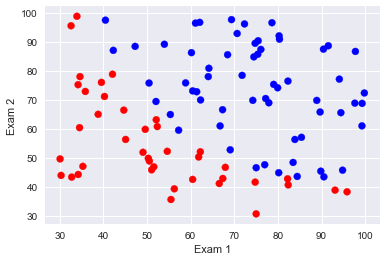

In [161]:
plt.scatter(df1['Exam1'], df1['Exam2'], color=df1['Pass'].apply(lambda x: 'red' if x==0 else 'blue' ))
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")

In [162]:
X = df1[['Exam1', 'Exam2']]
Y = df1['Pass']

clf = LogisticRegression(max_iter=10000, C=1000)
clf.fit(X,Y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
clf.score(X,Y)

0.89000000000000001

In [164]:
theta1, theta2 = clf.coef_[0][0], clf.coef_[0][1]
theta0 = clf.intercept_[0]

To find the decision boundary, solve $\theta_0 + \theta_1 x + \theta_2 y = 0$ for $y$, and plot $(x,y(x))$.

In [165]:
def f(x):
    return -(theta0 + theta1*x)/theta2

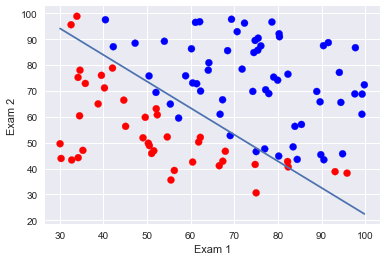

In [166]:
plt.scatter(df1['Exam1'], df1['Exam2'], color=df1['Pass'].apply(lambda x: 'red' if x==0 else 'blue' ))
plt.plot(df1['Exam1'].sort_values(), df1['Exam1'].sort_values().map(f))
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")

In [167]:
new_df = df1.rename(columns={"Exam1":"X1", "Exam2":"X2", "Pass":'Y'})

In [168]:
new_df["X1**2"] = np.square(new_df['X1'])
new_df["X2**2"] = np.square(new_df['X2'])
new_df['X1*X2'] = new_df['X1']*new_df['X2']

X = new_df[['X1', 'X2', 'X1**2', 'X2**2', 'X1*X2']]
Y = new_df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 25, random_state=42)

clf = LogisticRegression(max_iter=10000, C=1000)
clf.fit(X_train,Y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
print("Accuracy score on training data: ",clf.score(X_train, Y_train))
print("Accuracy score on testing data: ",clf.score(X_test, Y_test))

Accuracy score on training data:  1.0
Accuracy score on testing data:  1.0


To find the decision boundary, solve $\theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2 + \theta_5 x y = 0$ for $y$ and plot $(x,y(x))$.

In [155]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0][0]
theta2 = clf.coef_[0][1]
theta3 = clf.coef_[0][2]
theta4 = clf.coef_[0][3]
theta5 = clf.coef_[0][4]

def f2(x):
    a = theta4
    b = theta5*x + theta2
    c = theta0 + theta1*x + theta3*x**2
    ret1 = (-b + np.sqrt(b**2 - 4*a*c) )/(2*a)
    ret2 = (-b - np.sqrt(b**2 - 4*a*c) )/(2*a)
    return ret1, ret2

In [156]:
new_X = df1['Exam1'].sort_values()
new_Yhat1 = []
new_Yhat2 = []
for x in new_X:
    new_Yhat1.append(f2(x)[0] )
    new_Yhat2.append(f2(x)[1] )
    

(25, 102)

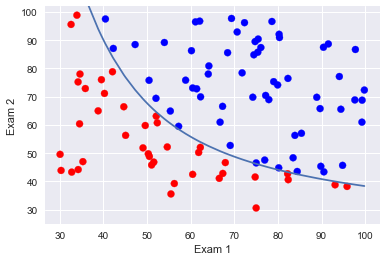

In [159]:
plt.scatter(df1['Exam1'], df1['Exam2'], color=df1['Pass'].apply(lambda x: 'red' if x==0 else 'blue' ))
plt.plot(new_X, new_Yhat1)
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.ylim(25,102)